In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# %matplotlib

In [2]:
IMG_PATH = './images/'

cordCromImg = []
cordCromImg.append(cv2.imread(IMG_PATH+'CoordCrom_1.png'))
cordCromImg.append(cv2.imread(IMG_PATH+'CoordCrom_2.png'))
cordCromImg.append(cv2.imread(IMG_PATH+'CoordCrom_3.png'))

whitePathImg = []
whitePathImg.append(cv2.imread(IMG_PATH+'WP_B.png'))
whitePathImg.append(cv2.imread(IMG_PATH+'WP_O.png'))
whitePathImg.append(cv2.imread(IMG_PATH+'WP_R.png'))

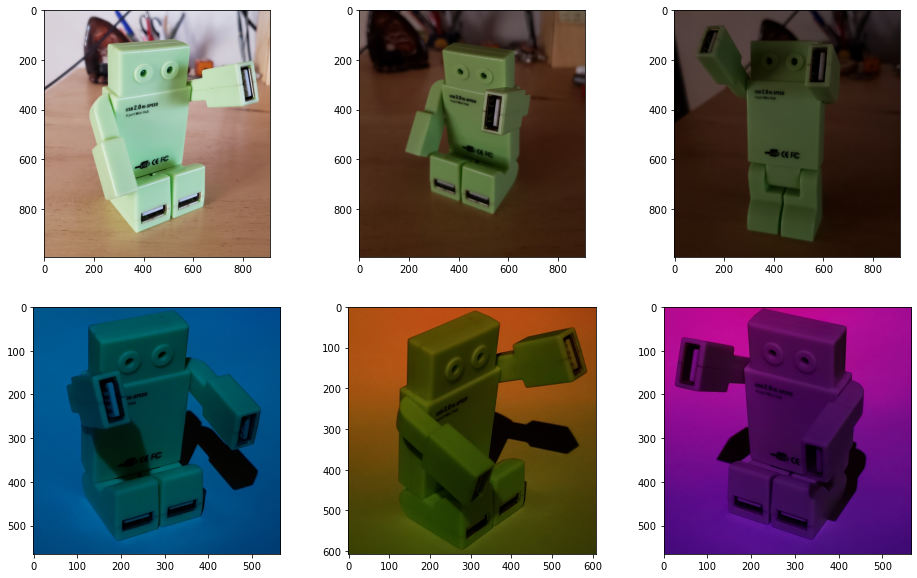

In [26]:
fig, axs = plt.subplots(1, 3,figsize=(16,10))
for i in range(3):
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.cvtColor(cordCromImg[i], cv2.COLOR_BGR2RGB))
    plt.subplot(2,3,i+4)
    plt.imshow(cv2.cvtColor(whitePathImg[i], cv2.COLOR_BGR2RGB))

# Coordenadas Cromáticas

In [81]:
def coordCrom(img):
    img_new = np.zeros(img.shape)
    total = img.sum(axis=2)
    total[total==0] = np.iinfo(total.dtype).max # Avoid divide by 0
    for ch in range(img.shape[2]):
        img_new[:,:,ch] = (img[:,:,ch]/total)
    return img_new

In [93]:
new_cordCromImg = []
for img in cordCromImg:
    new_cordCromImg.append(coordCrom(img))

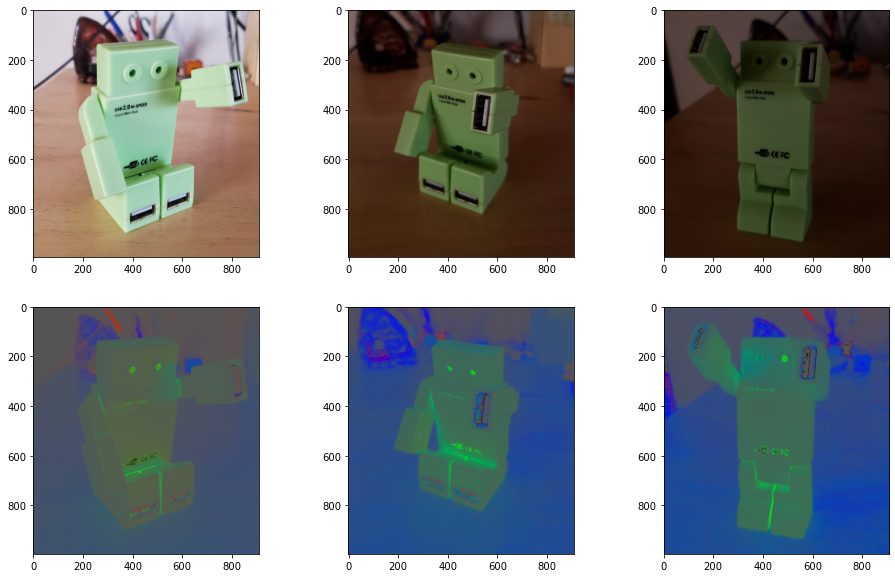

In [96]:
fig, axs = plt.subplots(1, 3,figsize=(16,10))
for i in range(3):
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.cvtColor(cordCromImg[i], cv2.COLOR_BGR2RGB))
    plt.subplot(2,3,i+4)
    plt.imshow(new_cordCromImg[i])

# White Path

In [3]:
def whitePath(img,max_pixel_val=255,percentil=95):
    new_img = np.zeros(img.shape)
    for ch in range(img.shape[2]):
        max_value = np.percentile(img[:,:,ch], PERCENTIL_VALUE)        
        new_img[:,:,ch] = (MAX_PIXEL_VALUE / max_value) * img[:,:,ch]
    return new_img.astype('uint8')

In [4]:
MAX_PIXEL_VALUE = 255
PERCENTIL_VALUE = 95

new_whitePathImg = []
for img in whitePathImg:
    new_whitePathImg.append(whitePath(img,max_pixel_val=MAX_PIXEL_VALUE,percentil=PERCENTIL_VALUE))
new_whitePathImg = np.array(new_whitePathImg, dtype="object")

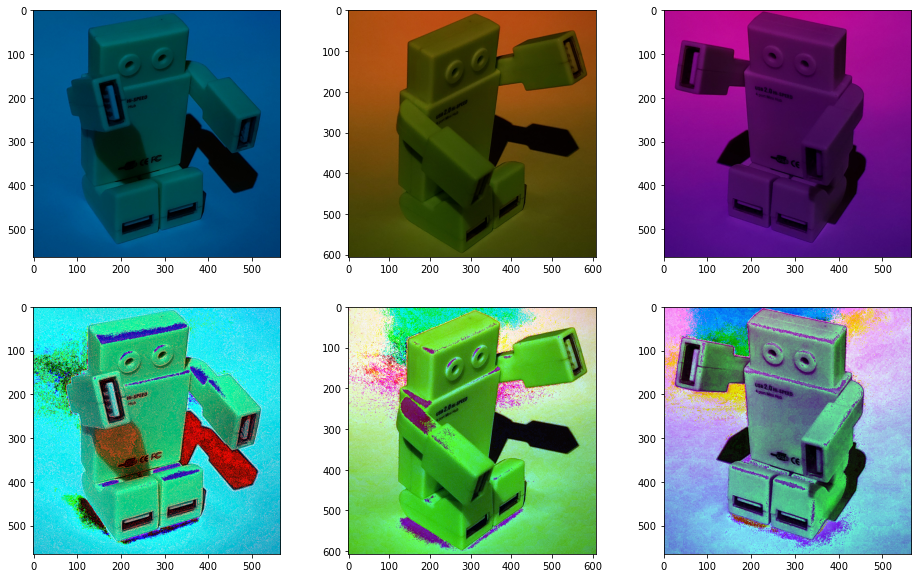

In [5]:
fig, axs = plt.subplots(1, 3,figsize=(16,10))
for i in range(3):
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.cvtColor(whitePathImg[i], cv2.COLOR_BGR2RGB))
    plt.subplot(2,3,i+4)
    plt.imshow(cv2.cvtColor(new_whitePathImg[i], cv2.COLOR_BGR2RGB))